In [374]:
import pandas as pd
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
file_dir = 'D:/Programming/DataScience/Seattle airBnB'

file_cal = file_dir + '/calendar.csv'
file_list = file_dir + '/listings.csv'
file_rev = file_dir + '/reviews.csv'

In [68]:
#Read in all 3 datasets and store in dataframes

df_calendar = pd.read_csv(file_cal)
df_list = pd.read_csv(file_list)
df_review = pd.read_csv(file_rev)

# Assess

In [6]:
#Get Shape of each df
print("Size of dataframes, rows, columns \n", 
      "Calendar : ", df_calendar.shape, "\n",
      "Listings : ", df_list.shape, "\n",
      "Reviews : ", df_review.shape,)

Size of dataframes, rows, columns 
 Calendar :  (1393570, 4) 
 Listings :  (3818, 92) 
 Reviews :  (84849, 6)


In [7]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [8]:
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [9]:
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [10]:
df_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [11]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [12]:
df_review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


After reviewing the Calendar data, it seems like there's a listing_id that can be used to join it to the other datasets. This data contains the availability and pricing for various listings in Seattle in 2016. The price of the listing for a particular date is only present if the listing was available(available = t). Otherwise the price is missing.

The listings data has several columns with either all null values and several columns that would not be relevant to any analysis done below, like the url, scrape_ID, etc.

# Clean

In [69]:
#get columns that have either no relevance to our questions, have a high number of blank values
cols_to_drop = ['listing_url','scrape_id','last_scraped','license','thumbnail_url','medium_url','picture_url','xl_picture_url',
               'host_thumbnail_url','host_picture_url','square_feet','host_id','host_url','host_name','host_location','host_about']

In [70]:
#drop columnes
df_list.drop(cols_to_drop,axis=1,inplace=True)

In [71]:
df_list['id'].nunique()

3818

In [72]:
#Get columns with 1 unique value in it
cols_to_drop_new = []

for col in df_list.columns.tolist():
    value_count = df_list[col].nunique()
    if value_count == 1:
        cols_to_drop_new.append(col)

In [73]:
#Drop columns
df_list.drop(cols_to_drop_new,axis=1,inplace=True)

In [74]:
#clean price columns to remove the $ and covert to INT
prices_to_clean = ['price','weekly_price','monthly_price','security_deposit','cleaning_fee']

In [75]:
#remove $ sign
for col in prices_to_clean:
    df_list[col] = df_list[col].str.replace('$','').str.split('.',expand=True)[0].str.replace(',','')

In [84]:
df_list['price'] = df_list['price'].astype(float)

In [94]:
#Fill na for weekly price by multiplying the daily rate by 7 days
df_list['weekly_price'] = df_list['weekly_price'].fillna(df_list['price']*7)

In [95]:
#Fill na for weekly price by multiplying the daily rate by 30 days
df_list['monthly_price'] = df_list['monthly_price'].fillna(df_list['price']*30)

# Analyze

## Question 1: When are listings typically available? During the weekend or during the weekdays? Is there any seasonality of when listings are available?

In [109]:
#convert date in calendar dataframe to datetime
df_calendar['date'] = pd.to_datetime(df_calendar['date'],format='%Y-%m-%d')

In [117]:
#Group by date and availability
df_avail = df_calendar.groupby(['date','available'],as_index=False)['listing_id'].count().rename({'listing_id':'counts'},axis=1)

In [118]:
#Pivot data to get booked rate
df_avail = pd.pivot_table(df_avail, values='counts',index='date',columns='available').reset_index()

In [119]:
#Calculate booked rate
df_avail['booked_rate'] = df_avail['f']/(df_avail['t'] + df_avail['f'])

In [139]:
df_avail['day_of_week'] = df_avail['date'].dt.dayofweek

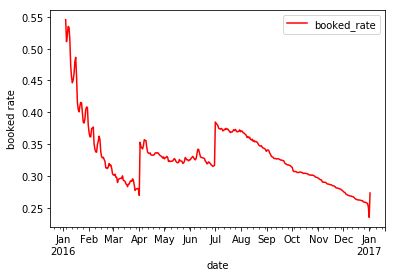

In [120]:
#Plot Booked rate by Month/Year
df_avail.plot(kind='line',x='date',y='booked_rate',color='red')
plt.ylabel('booked rate')
plt.show()

In [144]:
#Get graph outlining the booked rate by day of week
df_avail1 = df_avail.groupby(['day_of_week'],as_index=False)['booked_rate'].mean()

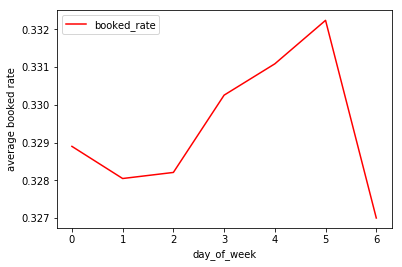

In [146]:
df_avail1.plot(kind='line',x='day_of_week',y='booked_rate',color='red')
plt.ylabel('average booked rate')
plt.show()

### Answer:

Based on the first chart which tracked the booked rate (number of listings that were booked on any given date vs total listings for that day), it seems like January has the highest rate, followed by spikes in April and Jul. While there wasn't a significant difference in average booked rate between each days within the week, the later parts of the week (Thurs - Sat) seems to have the highest rate. Most weekly rentals go from Sun-Sat, so this chart would make sense.

# Question 2: Which features have the biggest impact on the daily price of the listing?

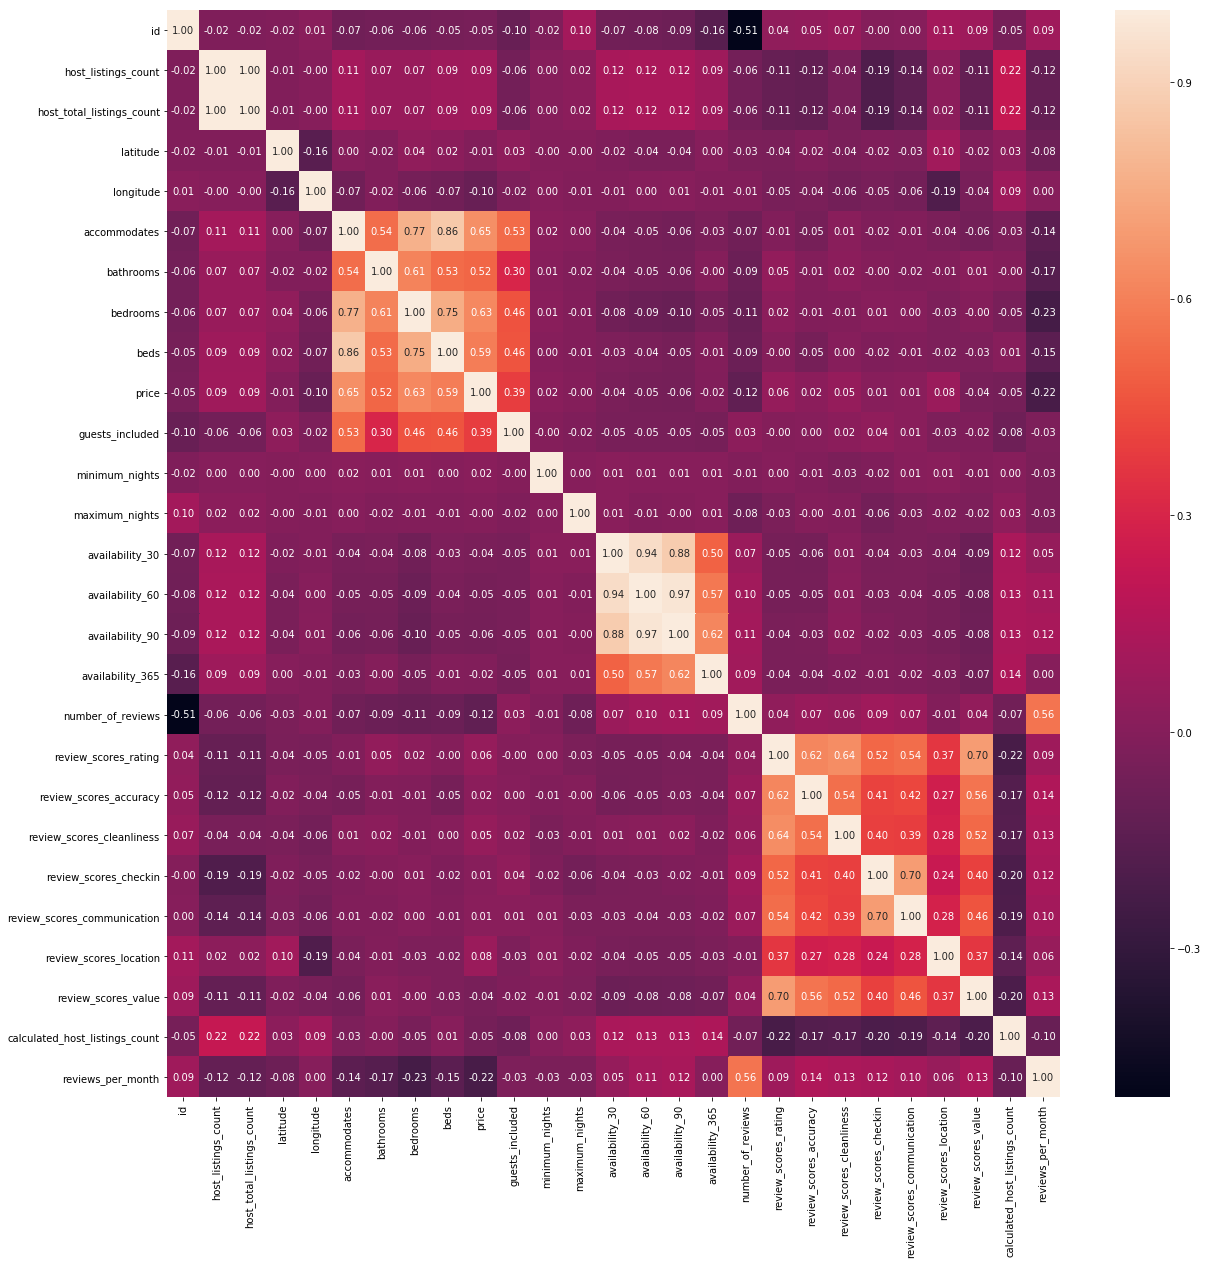

In [148]:
#Get Heatmap to see what features coorelate most to price
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_list.corr(), ax=ax, annot=True, fmt=".2f");

### Answer:

Based on the above heatmap, it looks like the number of beds/number of people that can comfortably fit into the listing have the largest positive correlation to price. Surprisingly the number of reviews per month had the largest negative correlation to price.

# Question 3: How accurately can we predict the daily price of a listing, based on the data from the listing data?

## Clean some more

In [250]:
#Clean listings data by only retaining the features that would be used for ML model below
df_list_final = df_list[['host_since','host_response_time','host_response_rate','host_is_superhost','neighbourhood_cleansed','neighbourhood_group_cleansed','zipcode',
         'property_type','room_type','bathrooms','bedrooms','beds','price','security_deposit','cleaning_fee','guests_included','review_scores_rating','instant_bookable']]

In [251]:
#Drop rows where the host since field is null
df_list_final.drop(df_list_final[df_list_final['host_since'].isnull()].index,inplace=True)

In [252]:
#calculate new feature outlining the number of days the host has been a host
df_list_final['host_since'] = pd.to_datetime(df_list_final['host_since'], format='%Y-%m-%d')

In [253]:
df_list_final['host_since'] = pd.to_datetime('2017-01-01',format='%Y-%m-%d') - df_list_final['host_since']

In [254]:
df_list_final['host_since'] = df_list_final['host_since'].astype(str).str.split(' ',expand=True)[0]

In [346]:
df_list_final['host_since'] = df_list_final['host_since'].astype(int)

In [255]:
df_list_final['host_response_time'].value_counts()

within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64

In [256]:
#Fill NA values with within a few hours
df_list_final.loc[df_list_final['host_response_time'].isnull(),'host_response_time'] = 'within a few hours'

In [257]:
#Remove % sign from host response rate
df_list_final['host_response_rate'] = df_list_final['host_response_rate'].str.replace('%','')

In [258]:
#Calculate mean response rate for non-null values
host_res_mean = df_list_final[~df_list_final['host_response_rate'].isnull()]['host_response_rate'].astype(int).mean()

In [265]:
#Fill NA values with mean
df_list_final['host_response_rate'] = df_list_final['host_response_rate'].fillna(host_res_mean).astype(int)

In [340]:
#Convert superhost to 1/0
df_list_final.loc[df_list_final['host_is_superhost'] == 't','host_is_superhost'] = 1
df_list_final.loc[df_list_final['host_is_superhost'] == 'f','host_is_superhost'] = 0

In [280]:
#Get row with NA in the zip field and send unique nneighbourhood_cleansed values to list
missing_zip = df_list_final[df_list_final['zipcode'].isnull()]['neighbourhood_cleansed'].unique().tolist()

In [288]:
# Find first non-null zip return for same neighbourhood_cleansed value in dataframe
mis_val_list = []

for val in missing_zip:
    val_list = df_list_final[df_list_final['neighbourhood_cleansed'] == val]['zipcode'].unique().tolist()[0]
    mis_val_list.append(val_list)

In [293]:
#Create dataframe with the neighborhood
df_mis = pd.DataFrame()
df_mis['neighbourhood_cleansed'] = missing_zip
df_mis['zipcode_new'] = mis_val_list

In [295]:
#Merge dataframes
df_list_final = df_list_final.merge(df_mis,how='left',on='neighbourhood_cleansed')

In [296]:
#Fill NA with zips from new dataframe
df_list_final.loc[df_list_final['zipcode'].isnull(),'zipcode'] = df_list_final['zipcode_new']

In [297]:
#Drop new zip field
df_list_final.drop('zipcode_new',axis=1,inplace=True)

In [300]:
#get count of all values in propertye type field
df_list_final['property_type'].value_counts()

House              1733
Apartment          1706
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

In [301]:
#Fill is NA value with House, since other fields have indicated it is either a house or apartment
df_list_final.loc[df_list_final['property_type'].isnull(),'property_type'] = 'House'

In [305]:
#Fill NA for bathrooms with 1
df_list_final['bathrooms'] = df_list_final['bathrooms'].fillna(1.0)

In [309]:
#Fill NA for beadrooms with 1
df_list_final['bedrooms'] = df_list_final['bedrooms'].fillna(1.0)

In [312]:
#Change Security deposit and cleaning fee columns to boolean showing if there is a fee or not
df_list_final['security_deposit'] = df_list_final['security_deposit'].fillna(0).astype(int)
df_list_final['cleaning_fee'] = df_list_final['cleaning_fee'].fillna(0).astype(int)

In [350]:
df_list_final.loc[df_list_final['security_deposit'] != 0, 'security_deposit'] = 1
df_list_final.loc[df_list_final['cleaning_fee'] != 0, 'cleaning_fee'] = 1

In [318]:
#Get mean for review_scores_rating and use that value to fill in missing values
rsr_mean = df_list_final[~df_list_final['review_scores_rating'].isnull()]['review_scores_rating'].mean()
df_list_final['review_scores_rating'] = df_list_final['review_scores_rating'].fillna(rsr_mean)

In [321]:
df_list_final['review_scores_rating'] = df_list_final['review_scores_rating'].astype(int)

In [324]:
#Fill NA for beadrooms with 1
df_list_final.loc[df_list_final['beds'].isnull(),'beds'] = 1.0

In [326]:
#Chnge instant bookable from t/f to 1/0
df_list_final.loc[df_list_final['instant_bookable'] == 't','instant_bookable'] = 1
df_list_final.loc[df_list_final['instant_bookable'] == 'f','instant_bookable'] = 0

In [347]:
#Get list of columns with object dtypes
obj_cols = df_list_final.select_dtypes(exclude=[np.number]).columns.tolist()

In [348]:
obj_cols

['host_response_time',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'zipcode',
 'property_type',
 'room_type']

In [351]:
df_list_final

,host_since,host_response_time,host_response_rate,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,property_type,room_type,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,review_scores_rating,instant_bookable
0,1970,within a few hours,96,0,West Queen Anne,Queen Anne,98119,Apartment,Entire home/apt,1.0,1.0,1.0,85.0,0,0,2,95,0
1,1410,within an hour,98,1,West Queen Anne,Queen Anne,98119,Apartment,Entire home/apt,1.0,1.0,1.0,150.0,1,1,1,96,0
2,934,within a few hours,67,0,West Queen Anne,Queen Anne,98119,House,Entire home/apt,4.5,5.0,7.0,975.0,1,1,10,97,0
3,1152,within a few hours,94,0,West Queen Anne,Queen Anne,98119,Apartment,Entire home/apt,1.0,0.0,2.0,100.0,0,0,1,94,0
4,1860,within an hour,100,0,West Queen Anne,Queen Anne,98119,House,Entire home/apt,2.0,3.0,3.0,450.0,1,1,6,92,0
5,2199,within a few hours,94,0,West Queen Anne,Queen Anne,98119,House,Private room,1.0,1.0,1.0,120.0,0,1,1,95,0
6,1677,within an hour,100,1,West Queen Anne,Queen Anne,98119,House,Private room,1.0,1.0,1.0,80.0,1,0,1,99,0
7,1524,within an hour,100,1,West Queen Anne,Queen Anne,98119,Cabin,Private room,1.0,1.0,1.0,60.0,1,1,1,97,0
8,1719,within a few hours,94,0,West Queen Anne,Queen Anne,98109,Apartment,Private room,1.0,1.0,1.0,90.0,0,0,1,97,0
9,1410,within an hour,98,1,West Queen Anne,Queen Anne,98119,Apartment,Entire home/apt,1.0,1.0,1.0,150.0,1,1,1,97,0


In [356]:
#Get dummies dataframe
df_final = pd.get_dummies(df_list_final)

In [396]:
def linear_reg_model(df_final):
    '''
    Input - dataframe
    Output - Linear Model
             X_train - dataframe
             X_test - dataframe
             y_train - dataframe
             y_test - dataframe
             
    Takes in Dataframe and splits dataframe into Train and test and instantiates linear model
    '''
    X = df_final.drop('price',axis=1)
    y = df_final['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    reg = LinearRegression()
    reg.fit(X_train,y_train)
    
    return reg, X_train, X_test, y_train, y_test

In [392]:
reg = linear_reg_model(df_final)

In [393]:
#predict test values
y_preds = reg.predict(X_test)

In [408]:
X_train.columns

Index(['host_since', 'host_response_rate', 'host_is_superhost', 'bathrooms',
       'bedrooms', 'beds', 'security_deposit', 'cleaning_fee',
       'guests_included', 'review_scores_rating',
       ...
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Tent', 'property_type_Townhouse',
       'property_type_Treehouse', 'property_type_Yurt',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object', length=166)

In [409]:
#create new dataframe outlining the columns and their coefficients in the liner regression model
df_coef = pd.DataFrame()
df_coef['coefficient'] = reg.coef_
df_coef['column_names'] = X_train.columns

In [415]:
#Sort columns by coefficient highest to lowest
df_coef.sort_values(by=['coefficient'],ascending=False)

,coefficient,column_names
63,5.653858e+10,neighbourhood_cleansed_Montlake
24,5.653858e+10,neighbourhood_cleansed_Broadway
76,5.653858e+10,neighbourhood_cleansed_Portage Bay
55,5.653858e+10,neighbourhood_cleansed_Madison Park
89,5.653858e+10,neighbourhood_cleansed_Stevens
149,3.313718e+10,property_type_Boat
152,3.313718e+10,property_type_Camper/RV
157,3.313718e+10,property_type_Loft
148,3.313718e+10,property_type_Bed & Breakfast
150,3.313718e+10,property_type_Bungalow


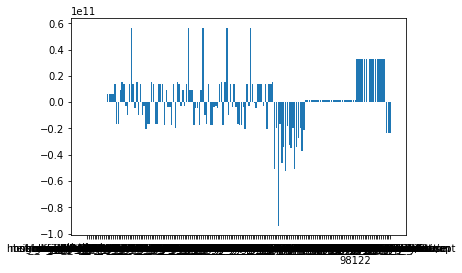

In [411]:
#Create plot to show the columns by coefficient
plt.bar(X_train.columns,reg.coef_)
plt.show()

In [394]:
#Get R2 score for predictions on test vs train sets
r2_score(y_test,y_preds)

0.6082459653628394

### Answer:

Using a linear regression model, we were able to get a R2 score to .608, which is pretty good considering we didn't engineer any additional features, nor scale our data. I'm sure we'd be able to get better scores if we were to use a non-liner model.

After reviewing the coefficient for the liner model, it seems like the neighborhood of the listings had the largest impact to price.